In [82]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv",index_col=1,parse_dates=True)
df.head(2)

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
Date,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240


In [3]:
#Sort index to be sure that dates are increasing, change data sequence to monthly basis,check if index is correct
df=df.sort_index(ascending=True)
df=df.resample('M').sum()
df.index

DatetimeIndex(['2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [4]:
#Checking missing values
df.isnull().sum()

ID                0
Invoice Number    0
Product Code      0
Customer Code     0
QTY               0
Total Price       0
dtype: int64

In [5]:
#Delete missing values
df = df.dropna(axis=0, how='any')

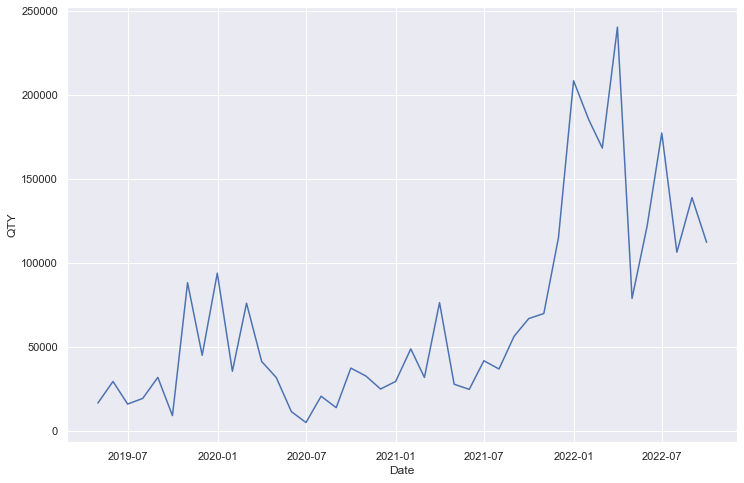

In [28]:
#Selection needed columns and plot time series data with seaborn library
df_ts = df[["QTY"]]
sns.lineplot(data=df_ts,x="Date", y="QTY")
plt.rcParams["figure.figsize"] = (12, 8)
sns.set_theme(style="darkgrid")
plt.show()

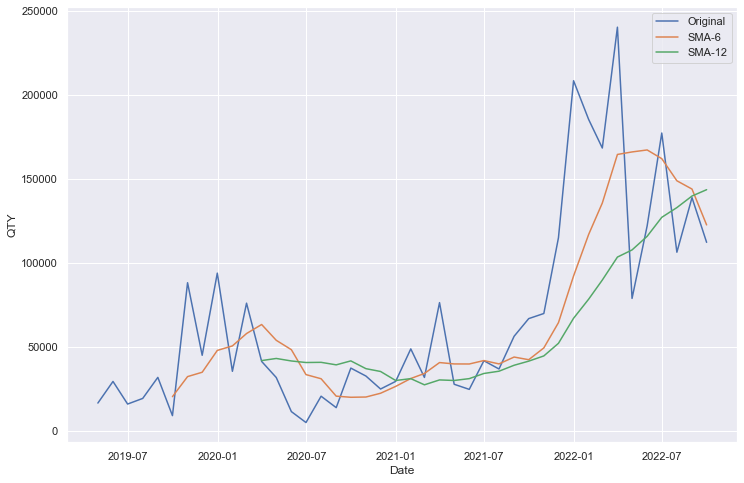

In [30]:
#Lets start forecasting with simple moving average, with windows =6 and 12, and plot it with real data
SMA_6 = df_ts['QTY'].rolling(window=6).mean()
SMA_12 = df_ts['QTY'].rolling(window=12).mean()
plt.plot(df_ts.index, df_ts['QTY'], label='Original')
plt.plot(df_ts.index, SMA_6, label='SMA-6')
plt.plot(df_ts.index, SMA_12, label='SMA-12')
plt.legend()
plt.xlabel('Date')
plt.ylabel('QTY')
plt.show()

In [33]:
#splitting data for train and test 
train_data = df_ts[:'2022-02-28']
test_data = df_ts['2022-02-28':]

C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


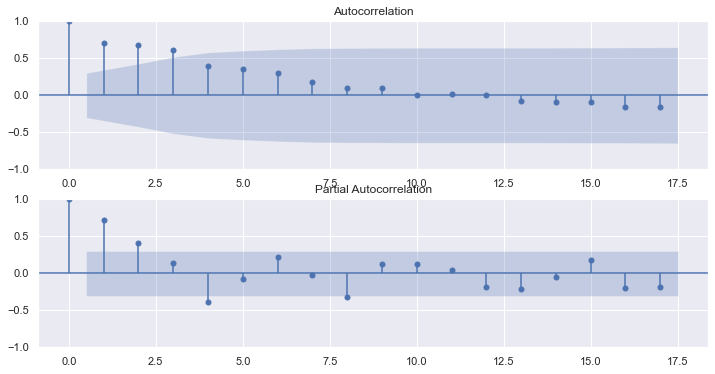

In [37]:
# Create ACF and PACF plots, for find p(pacf) and q(acf)
fig, ax = plt.subplots(2, figsize=(12,6))
plot_acf(df_ts, ax=ax[0])
plot_pacf(df_ts, ax=ax[1])
plt.show()

C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


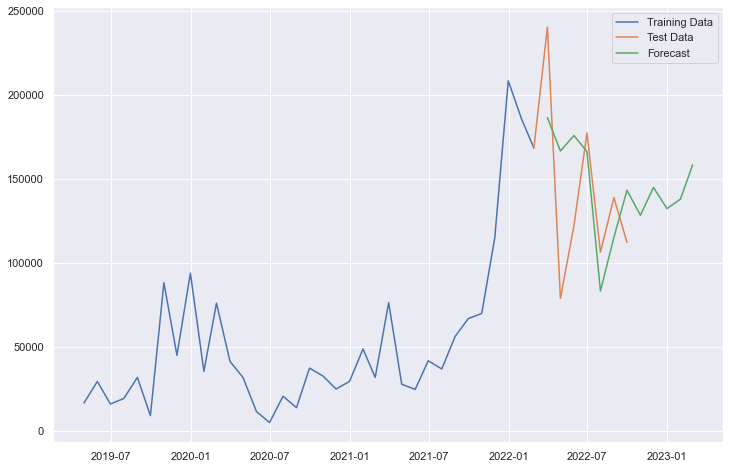

In [96]:
# Fit ARIMA model, make predictions(for next 12 months) and plot both datasets
model = ARIMA(train_data, order=(14, 1, 5))  # set p=2, d=1, q=1
model_fit = model.fit()
future_steps = 12
forecast_1 = model_fit.forecast(steps=future_steps)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_1, label='Forecast')
plt.legend()
plt.show()

C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


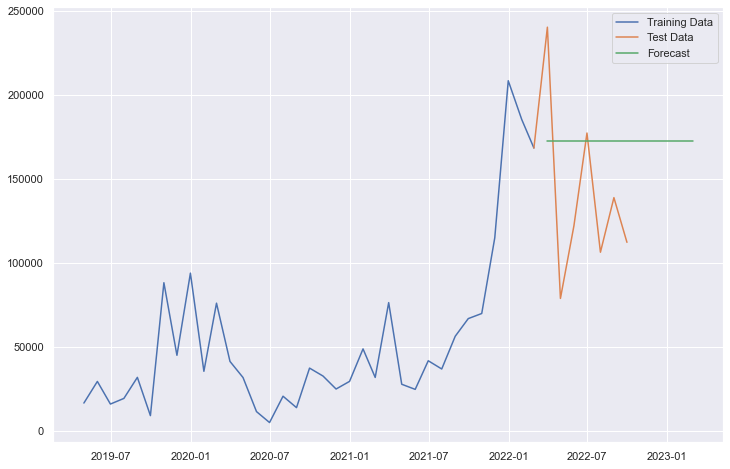

In [98]:
#Lets try to forecast with Simple Exponential Smoothing
model = SimpleExpSmoothing(train_data)
fit = model.fit()
predictions_1 = fit.forecast(12)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions_1, label='Forecast')
plt.legend()
plt.show()

C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


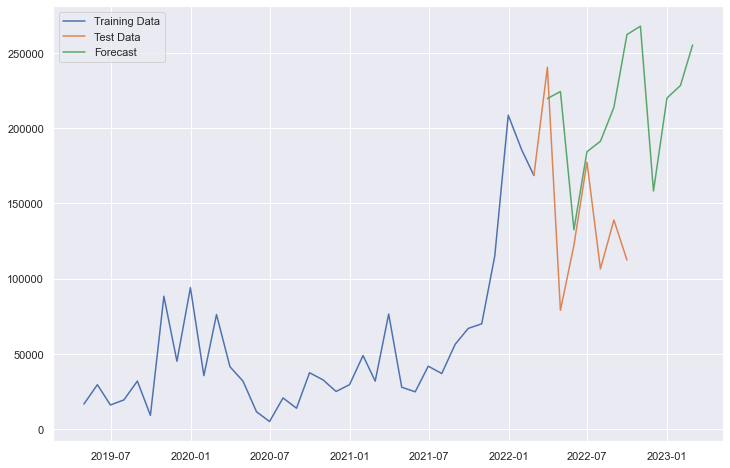

In [100]:
#Forecast with Triple Exponential Smoothing
model = ExponentialSmoothing(train_data,trend="mul",seasonal="mul",seasonal_periods=6)
fit = model.fit()
predictions_2 = fit.forecast(12)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions_2, label='Forecast')
plt.legend()
plt.show()

C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


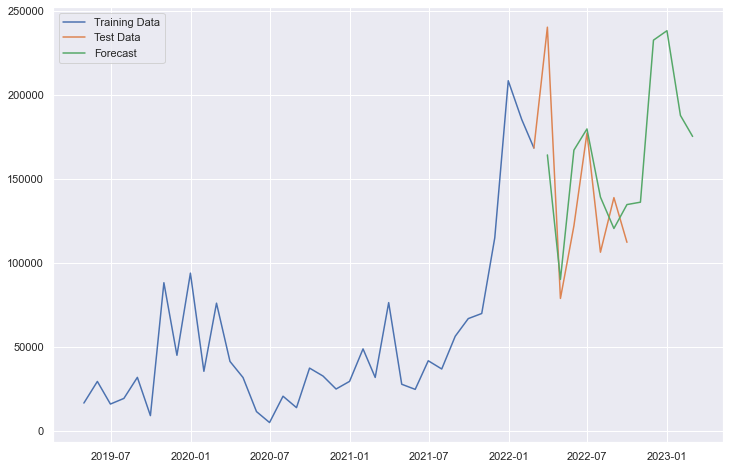

In [102]:
#Lets see the last model, sarimax
model = SARIMAX(train_data, order=(10,1,3), seasonal_order=(1,1,1,12))
fit = model.fit()
predictions_3 = fit.forecast(12)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions_3, label='Forecast')
plt.legend()
plt.show()

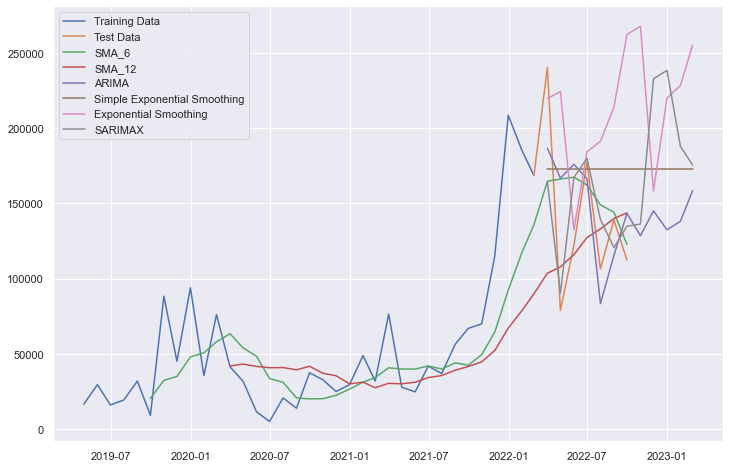

In [103]:
#Lets plot all models together
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(SMA_6, label='SMA_6')
plt.plot(SMA_12, label='SMA_12')
plt.plot(forecast_1, label='ARIMA')
plt.plot(predictions_1, label='Simple Exponential Smoothing')
plt.plot(predictions_2, label='Exponential Smoothing')
plt.plot(predictions_3, label='SARIMAX')
plt.legend()
plt.show()